In [1]:
%matplotlib widget
# %matplotlib ipympl 
#Successfully uninstalled tornado-6.1
import argparse
import gc
import random
import torch
from PIL import Image
from torchvision.transforms import PILToTensor
from src.models.dift_sd import SDFeaturizer
from src.utils.visualization import Demo

In [2]:
torch.cuda.set_device(1)

In [3]:
dift = SDFeaturizer()

In [22]:
category = 'lego'

if category == 'fern':
    filelist = [
        '/home/galharari/datasets/nerf_llff_data/fern_5_v_to_add_to_existing_colmap/rendered/2023-07-17_12-56.png',
        '/home/galharari/datasets/nerf_llff_data/fern/images/IMG_4030.JPG',
        # '/home/galharari/datasets/nerf_llff_data/fern/images/IMG_4034.JPG',
        # '/home/galharari/datasets/nerf_llff_data/fern/images/IMG_4035.JPG'
    ]
    prompt = 'a photo of a fern plant in the lobby of a fancy building'
elif category == 'lego':
    filelist = [
        
        # '/home/galharari/datasets/nerf_synthetic/lego/train/r_25.png',
        # '/home/galharari/datasets/nerf_synthetic/lego/train/r_17.png',
        # '/home/galharari/datasets/nerf_synthetic/lego/train/r_2.png',
        # '/home/galharari/datasets/nerf_synthetic/lego 3 train/rendered/2023-07-17_16-37.png',
        '/home/galharari/datasets/nerf_synthetic/lego/train/r_0.png',
        '/home/galharari/datasets/nerf_synthetic/lego 3 train/rendered/2023-07-17_16-41.png',
    ]
    prompt = 'a 3D model of a lego bulldozer'

prompt = f'a photo of a {category}'

In [23]:
ft = []
ft_std = []

imglist = []

# decrease these two if you don't have enough RAM or GPU memory
img_size = 512
ensemble_size = 4

for filename in filelist:
    img = Image.open(filename).convert('RGB')
    img = img.resize((img_size, img_size))
    imglist.append(img)
    img_tensor = (PILToTensor()(img) / 255.0 - 0.5) * 2
    ft_tensor, ft_std_tensor = dift.forward(img_tensor,
                           prompt=prompt,
                           ensemble_size=ensemble_size)
    ft.append(ft_tensor)
    ft_std.append(ft_std_tensor)
ft = torch.cat(ft, dim=0)
ft_std = torch.cat(ft_std, dim=0)


gc.collect()
torch.cuda.empty_cache()

In [24]:
demo = Demo(imglist, ft, ft_std, img_size)

total    : 11264.0 Mb
free     : 11007.625 Mb
used     : 256.375 Mb



feat_size: torch.Size([2, 1280, 32, 32]) feat_std_size: torch.Size([2, 1, 32, 32]) | img_size: 512


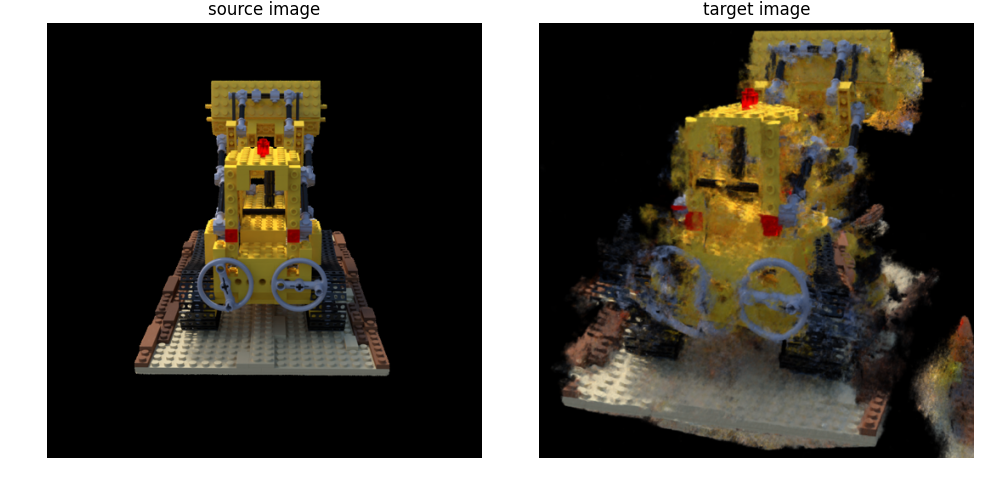

In [26]:
'''
left is source image, right is target image.
you can click on the source image, and DIFT will find the corresponding
point on the right image, mark it with red point and also plot the per-pixel 
cosine distance as heatmap.
'''
demo.plot_img_pairs(fig_size=5)